PID Controller Notebook

Tutor:
* Anthropic's AI Claude
* OpenAI's AI ChatGPT

A PID (Proportional-Integral-Derivative) controller is a widely used feedback control mechanism in industrial systems and robotics. Here's a high-level explanation:

1. Purpose: PID controllers aim to maintain a desired setpoint in a system by continuously adjusting an output based on error.

2. Components:
   - Proportional (P): Responds to the current error
   - Integral (I): Accounts for past errors
   - Derivative (D): Anticipates future errors

3. Function: It calculates an error value as the difference between a desired setpoint and a measured process variable, then applies a correction based on P, I, and D terms.

4. Advantages:
   - Simple to implement
   - Effective for a wide range of applications
   - Can be tuned for specific system requirements

5. Applications: Used in temperature control, motor speed control, industrial processes, and more.

# PID (Proportional-Integral-Derivative) Control Algorithm
The PID control algorithm is defined as:
```
u(t) = Kp * e(t) + Ki * ∫e(τ)dτ + Kd * de(t)/dt
```
## Glossary of Terms and Symbols
| Term/Symbol | Description |
|-------------|-------------|
| PID | Proportional-Integral-Derivative |
| `u(t)` | Control signal at time t |
| `e(t)` | Error signal at time t |
| `Kp` | Proportional gain |
| `Ki` | Integral gain |
| `Kd` | Derivative gain |
| Setpoint | Desired value of the process variable |
| Process Variable | The variable being controlled in the process |
| Proportional Term | Responds to the current error (`Kp * e(t)`) |
| Integral Term | Responds to the accumulated error over time (`Ki * ∫e(τ)dτ`) |
| Derivative Term | Responds to the rate of change of error (`Kd * de(t)/dt`) |
| Overshoot | When the process variable exceeds the setpoint |
| Steady-state Error | Constant error between setpoint and process variable after transient response |
| Rise Time | Time taken for the output to reach a specified percentage of its final value |
| Settling Time | Time taken for the system to reach and stay within a specified range of its final value |
| Tuning | The process of adjusting Kp, Ki, and Kd to optimize controller performance |
| Feedback | The process of measuring the output and feeding it back to compare with the setpoint |
| Closed-loop System | A system that uses feedback control |
| Ziegler-Nichols Method | A common technique for tuning PID controllers |

This Python script demonstrates a PID controller in action, simulating a simple heating system. Here's a breakdown of its key components:

1. PIDController class: Implements the PID control algorithm we discussed earlier.
2. HeatingSystem class: Simulates a simple heating system with some random noise to mimic real-world conditions.
3. run_simulation function: Runs the system for a specified duration, changing the setpoint halfway through to demonstrate the controller's ability to adapt.
4. Visualization: Uses matplotlib to plot the results, showing how the system temperature tracks the setpoint over time.

The script includes an abstract at the beginning, explaining its purpose and components. It's fully commented to explain each part of the code.

To run this script, you'll need Python installed with matplotlib and numpy libraries. The graphical output will show how the temperature (blue line) tries to follow the setpoint (orange dashed line). You'll see that:

1. The system initially tries to reach the first setpoint (25°C).
2. There's some oscillation as it approaches the setpoint, demonstrating the PID controller in action.
3. Halfway through, the setpoint changes (to 30°C), and the system adapts to reach the new target.

This visualization helps to understand concepts like rise time, settling time, and how the PID controller responds to changes in the setpoint.

You can experiment with different PID parameters (Kp, Ki, Kd) to see how they affect the system's behavior. For example, increasing Kp will make the system respond more quickly but may cause more oscillation, while increasing Ki will help eliminate steady-state error but could lead to more overshoot.


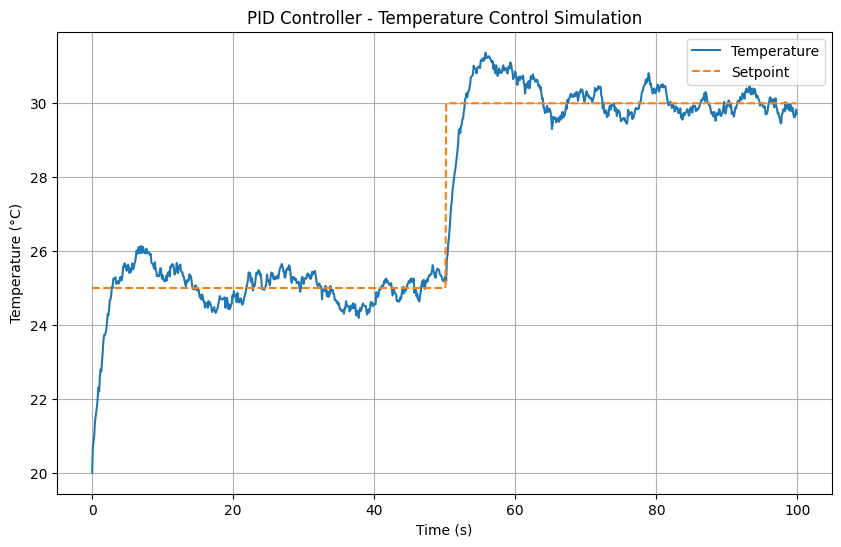

In [ ]:
"""
PID Controller Simulation with Visualization

Abstract:
This script demonstrates the implementation and behavior of a PID (Proportional-Integral-Derivative)
controller in a simulated environment. It models a simple system where the goal is to reach and
maintain a target temperature. The script includes a PID controller class, a simulated heating
system, and a visualization component to graphically represent the system's behavior over time.

Key components:
1. PID Controller: Implements the PID control algorithm
2. HeatingSystem: Simulates a simple heating system with some random noise
3. Simulation: Runs the system for a specified duration
4. Visualization: Uses matplotlib to plot the results

This script serves as an educational tool to understand PID control concepts, including setpoint
tracking, system response, and the effects of different PID parameters.

Requirements:
- Python 3.x
- matplotlib
- numpy
"""

import matplotlib.pyplot as plt
import numpy as np

class PIDController:
    def __init__(self, Kp, Ki, Kd, setpoint):
        self.Kp = Kp  # Proportional gain
        self.Ki = Ki  # Integral gain
        self.Kd = Kd  # Derivative gain
        self.setpoint = setpoint  # Desired value
        self.previous_error = 0
        self.integral = 0

    def compute(self, current_value, dt):
        # Calculate error
        error = self.setpoint - current_value

        # Proportional term
        P = self.Kp * error

        # Integral term
        self.integral += error * dt
        I = self.Ki * self.integral

        # Derivative term
        derivative = (error - self.previous_error) / dt
        D = self.Kd * derivative

        # Calculate total output
        output = P + I + D

        # Update previous error
        self.previous_error = error

        return output

class HeatingSystem:
    def __init__(self, initial_temp):
        self.temperature = initial_temp

    def update(self, heat_input, dt):
        # Simulate temperature change with some random noise
        self.temperature += heat_input * dt
        self.temperature += np.random.normal(0, 0.1)  # Add some noise
        return self.temperature

def run_simulation(duration, dt, pid_controller, heating_system):
    time = np.arange(0, duration, dt)
    temperatures = []
    setpoints = []

    for t in time:
        current_temp = heating_system.temperature
        temperatures.append(current_temp)
        setpoints.append(pid_controller.setpoint)

        control_output = pid_controller.compute(current_temp, dt)
        heating_system.update(control_output, dt)

        # Change setpoint halfway through the simulation
        if t > duration / 2:
            pid_controller.setpoint = 30

    return time, temperatures, setpoints

# Set up the simulation
simulation_time = 100  # seconds
dt = 0.1  # time step
initial_temp = 20  # degrees Celsius
target_temp = 25  # degrees Celsius

# Create PID controller and heating system
pid = PIDController(Kp=0.5, Ki=0.1, Kd=0.1, setpoint=target_temp)
heater = HeatingSystem(initial_temp)

# Run simulation
time, temperatures, setpoints = run_simulation(simulation_time, dt, pid, heater)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, temperatures, label='Temperature')
plt.plot(time, setpoints, label='Setpoint', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('PID Controller - Temperature Control Simulation')
plt.legend()
plt.grid(True)
plt.show()

Good evening! Reviewing your script and the attached output, it looks like your PID controller is functioning well, showing the temperature system response over time. The key elements in the simulation include a realistic system response, with random noise simulating real-world conditions, and a change in setpoint midway through the process.

### Key Observations:

1. **Initial Response:**
   - The system initially oscillates around the setpoint of 25°C, indicating that the PID controller is active but still adjusting due to the combination of proportional, integral, and derivative terms.
   - The oscillations in temperature before stabilization around 25°C are expected since the integral term is correcting accumulated errors over time, and the derivative term helps smooth out the response.
   - Noise is visible in the early stage, but the PID manages to maintain control and converges closer to the setpoint.

2. **Setpoint Change at Halfway (t = 50s):**
   - The jump in setpoint to 30°C occurs as expected, with a clear step-change in the desired value.
   - The system reacts with a rapid increase in temperature, overshooting slightly before settling back down, which is typical of PID controllers when faced with a sudden change.
   - The overshoot followed by oscillations as the system stabilizes shows that the derivative and integral components are active, as they reduce the error over time.

### Comments on the PID Parameters:

- **Proportional gain (Kp = 0.5)**: This value seems to balance well between responsiveness and stability. A higher Kp would have made the system more aggressive but might increase oscillations or instability.
  
- **Integral gain (Ki = 0.1)**: This term helps the controller correct accumulated errors, particularly over time. A higher value would make the system reach the setpoint quicker but could lead to more overshooting or larger oscillations.

- **Derivative gain (Kd = 0.1)**: This value contributes to smoothing out the rapid changes and helps reduce overshooting. The response shows that the derivative term is preventing the system from oscillating too wildly after changes in setpoint.

### Possible Improvements:

1. **Fine-tuning the PID constants**: Depending on the system's tolerance for overshoot and response time, the values of Kp, Ki, and Kd can be further tuned. If you want a faster response, increasing Kp or Ki might help, but at the cost of more oscillations or overshooting.
   
2. **Noise handling**: If the noise in the system is too disruptive, you could consider adding a noise filter, or adjusting the PID gains to make the controller less sensitive to noise.

3. **Additional setpoints**: If you want to explore further, you could experiment with more dynamic setpoint changes to see how the controller adapts over time to varying targets.

Overall, the script is a solid demonstration of PID control in action, and the results align with what you'd expect from such a simulation. If you'd like to explore further adjustments or specific questions, feel free to let me know!